In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## Classification Example - MNIST

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# rescale the images from [0, 255] to the [0.0, 0.1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


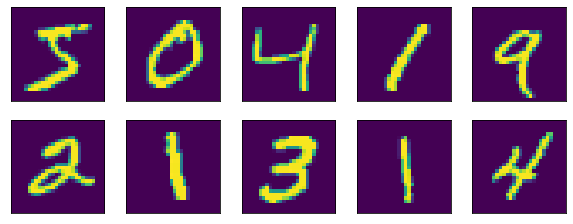

In [7]:
# check the first 10 examples

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Modeling

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(x_train, 
                             y_train, 
                             epochs=5,
                            validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3267 - accuracy: 0.9054 - val_loss: 0.1569 - val_accuracy: 0.9551
Epoch 2/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1568 - accuracy: 0.9535 - val_loss: 0.1179 - val_accuracy: 0.9645
Epoch 3/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1179 - accuracy: 0.9649 - val_loss: 0.0992 - val_accuracy: 0.9714
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.0932 - accuracy: 0.9713 - val_loss: 0.0955 - val_accuracy: 0.9726
Epoch 5/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0804 - accuracy: 0.9744 - val_loss: 0.0829 - val_accuracy: 0.9743


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Evaluate returns the loss value and metrics values for the model.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0773 - accuracy: 0.9757


[0.07734572142362595, 0.9757000207901001]

Metrics like f1 score have been removed from Keras core. You need to calculate them manually. They removed them on 2.0 version. Those metrics are all global metrics, but Keras works in batches. 

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

157/157 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



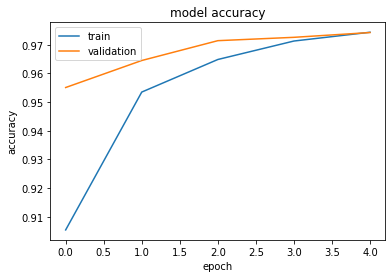

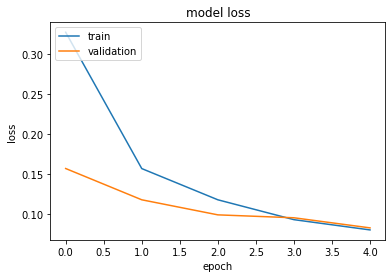

In [12]:
# summarize history for accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# CNN

In [13]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# rescale the images from [0, 255] to the [0.0, 0.1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [15]:
x_train[0].shape

(28, 28)

In [16]:
# reshape dataset to have a single channel
x_train_reshaped = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_reshaped = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [17]:
x_train_reshaped.shape, x_train.shape

((60000, 28, 28, 1), (60000, 28, 28))

In [18]:
x_train_reshaped[0].shape

(28, 28, 1)

In [19]:
from tensorflow.keras.utils import to_categorical

# one hot encode target values
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

In [20]:
y_train.shape, y_train_encoded.shape

((60000,), (60000, 10))

In [23]:
# Create the convolutional base

# extra convolutional layer
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense


model_cnn = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), 
           activation='relu', 
           input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')    
])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

The output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

To complete our model, we need to feed the last output tensor from the convolutional base (of shape (11, 11, 64)) into one or more Dense layers to perform classification.
Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor.

In [24]:
# Compile and train the model
model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history_cnn = model_cnn.fit(x=x_train_reshaped, 
                             y=y_train_encoded, 
                             epochs=5,
                             validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 103s 69ms/step - loss: 0.1595 - accuracy: 0.9517 - val_loss: 0.0777 - val_accuracy: 0.9775
Epoch 2/5
1500/1500 [==============================] - 73s 48ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 3/5
1500/1500 [==============================] - 78s 52ms/step - loss: 0.0374 - accuracy: 0.9885 - val_loss: 0.0409 - val_accuracy: 0.9880
Epoch 4/5
1500/1500 [==============================] - 84s 56ms/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 5/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0398 - val_accuracy: 0.9880


In [25]:
# Evaluate returns the loss value and metrics values for the model.
model_cnn.evaluate(x_test_reshaped, y_test_encoded)

313/313 [==============================] - 4s 12ms/step - loss: 0.0333 - accuracy: 0.9902


[0.03329288959503174, 0.9901999831199646]

In [26]:
y_pred_cnn = model_cnn.predict(x_test_reshaped, batch_size=64, 
                               verbose=1)
y_pred_bool_cnn = np.argmax(y_pred_cnn, axis=1)

print(classification_report(y_test, y_pred_bool_cnn))

157/157 [==============================] - 3s 17ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.97      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



(0.9, 1.0)

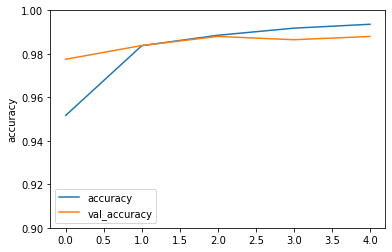

In [27]:
# summarize history for accuracy
df_result = pd.DataFrame(history_cnn.history)
df_result[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
plt.ylim(.9, 1)

(0.0, 0.2)

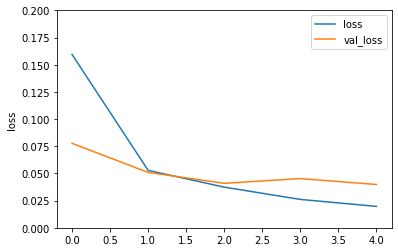

In [28]:
# summarize history for loss
df_result[['loss', 'val_loss']].plot()
plt.ylabel("loss")
plt.ylim(0, 0.2)

### visualize layers

In [29]:
layer1 = model_cnn.layers[0]

In [30]:
weights, biases = layer1.get_weights()

In [31]:
weights.shape

(3, 3, 1, 32)

Using a filter smaller than the input is intentional as it allows the same filter (set of weights) to be multiplied by the input array multiple times at different points on the input. Specifically, the filter is applied systematically to each overlapping part or filter-sized patch of the input data, left to right, top to bottom.

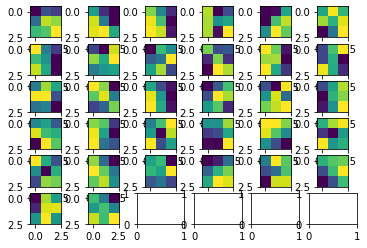

In [33]:
fig, axes = plt.subplots(6, 6)
for ax, weight in zip(axes.ravel(), weights.T):
    ax.imshow(weight[0, :, :])

In [34]:
from tensorflow.keras import backend as K

# with a Sequential model
get_1rd_layer_output = K.function([model_cnn.layers[0].input],
                                  [model_cnn.layers[0].output])
get_3rd_layer_output = K.function([model_cnn.layers[0].input],
                                  [model_cnn.layers[3].output])

layer1_output = get_1rd_layer_output([x_train_reshaped[:5]])[0]
layer3_output = get_3rd_layer_output([x_train_reshaped[:5]])[0]

In [35]:
layer1_output.shape

(5, 26, 26, 32)

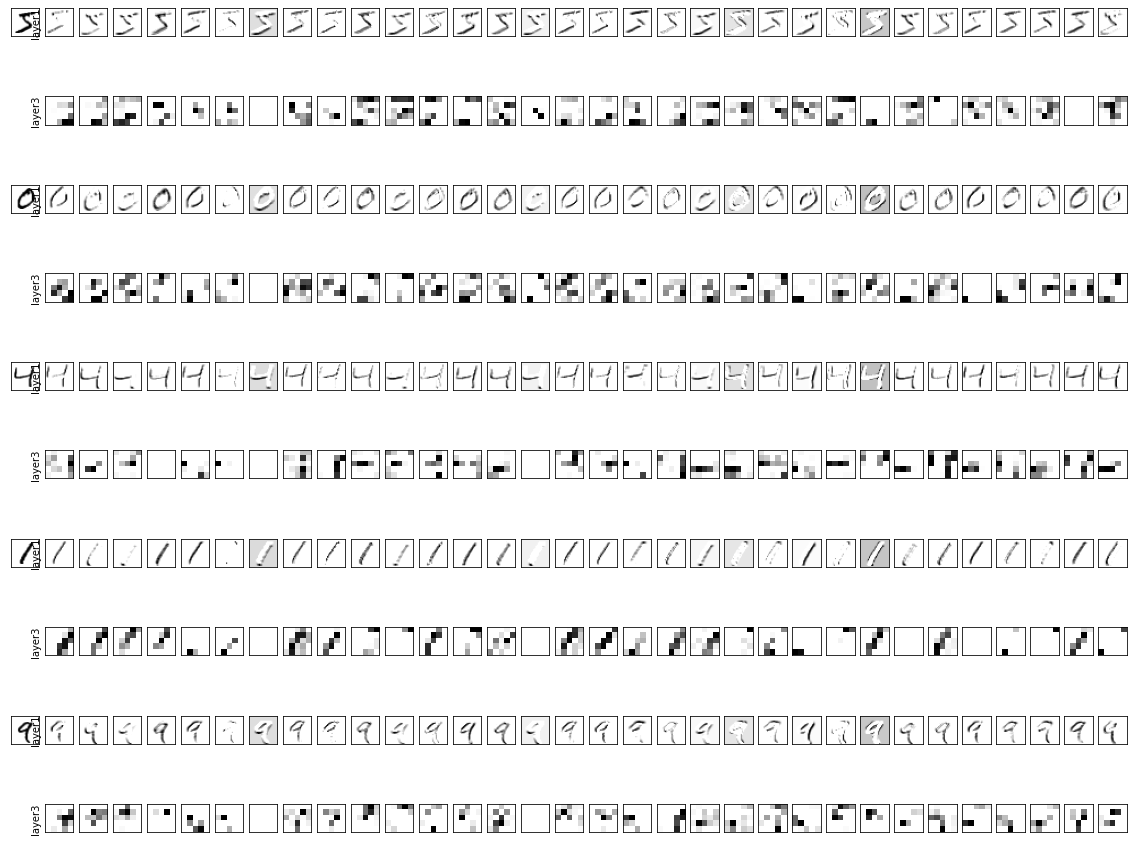

In [37]:
weights, biases = model_cnn.layers[0].get_weights()
n_images = layer1_output.shape[0]
n_filters = layer1_output.shape[3]
# n_filters = 5



fig, axes = plt.subplots(n_images * 2, n_filters + 1, figsize=(20, 16), subplot_kw={'xticks': (), 'yticks': ()})
for i in range(n_images):
    # for reach input image (= 2 rows)
    axes[2 * i, 0].imshow(x_train_reshaped[i, :, :, 0], cmap="gray_r")
    axes[2 * i + 1, 0].set_visible(False)
    axes[2 * i, 1].set_ylabel("layer1")
    axes[2 * i + 1, 1].set_ylabel("layer3")
    for j in range(n_filters):
        # for each feature map (same number in layer 1 and 3)
        axes[2 * i, j + 1].imshow(layer1_output[i, :, :, j], cmap='gray_r')
        axes[2 * i + 1, j + 1].imshow(layer3_output[i, :, :, j], cmap='gray_r')

# Batch Normalization

In [39]:
# Create the convolutional base

# extra convolutional layer
from tensorflow.keras.layers import  BatchNormalization


model_cnn_bn = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), 
           activation='relu', 
           input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')    
])

model_cnn_bn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)              

In [40]:
# Compile and train the model
model_cnn_bn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history_cnn_bn = model_cnn_bn.fit(x=x_train_reshaped, 
                             y=y_train_encoded, 
                             epochs=5,
                             validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 142s 94ms/step - loss: 0.1141 - accuracy: 0.9647 - val_loss: 0.0648 - val_accuracy: 0.9811
Epoch 2/5
1500/1500 [==============================] - 131s 87ms/step - loss: 0.0435 - accuracy: 0.9866 - val_loss: 0.0552 - val_accuracy: 0.9843
Epoch 3/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 4/5
1500/1500 [==============================] - 134s 89ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0403 - val_accuracy: 0.9892
Epoch 5/5
1500/1500 [==============================] - 119s 79ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0391 - val_accuracy: 0.9890


In [41]:
model_cnn_bn.evaluate(x_test_reshaped, y_test_encoded)

313/313 [==============================] - 8s 26ms/step - loss: 0.0412 - accuracy: 0.9884


[0.041232310235500336, 0.9883999824523926]

In [42]:
y_pred_cnn_bn = model_cnn_bn.predict(x_test_reshaped, batch_size=64, 
                               verbose=1)
y_pred_bool_cnn_bn = np.argmax(y_pred_cnn_bn, axis=1)

print(classification_report(y_test, y_pred_bool_cnn_bn))

157/157 [==============================] - 6s 38ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.97      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



(0.9, 1.0)

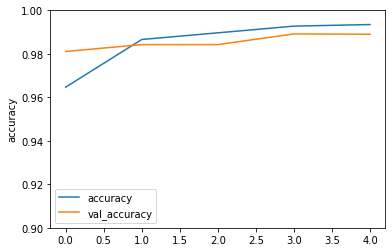

In [43]:
# summarize history for accuracy
df_result = pd.DataFrame(history_cnn_bn.history)
df_result[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
plt.ylim(.9, 1)

In [ ]:
# Transfer learning with CNN